Notebook para exploração dos dados, treinamento e teste do modelo

# Carregando os dados

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Carregar o conjunto de dados
dados = pd.read_csv("dataset/brasile-real-estate-dataset.csv", encoding="latin1")

# Exibir as primeiras linhas do dataset
print(dados.head())

   Unnamed: 0 property_type       state     region       lat        lon  \
0           1     apartment  Pernambuco  Northeast -8.134204 -34.906326   
1           2     apartment  Pernambuco  Northeast -8.126664 -34.903924   
2           3     apartment  Pernambuco  Northeast -8.125550 -34.907601   
3           4     apartment  Pernambuco  Northeast -8.120249 -34.895920   
4           5     apartment  Pernambuco  Northeast -8.142666 -34.906906   

   area_m2  price_brl  
0     72.0  414222.98  
1    136.0  848408.53  
2     75.0  299438.28  
3    187.0  848408.53  
4     80.0  464129.36  


# Tratamento dos Dados

In [ ]:
from geopy.geocoders import Nominatim
import reverse_geocoder as rg

def obter_cidade(row):
    
    """Obtém a cidade com base na latitude e longitude de uma linha."""

    latitude = row['lat']
    longitude = row['lon']

    #BUSCA ONLINE - MUITO LENTO, MAIS PRECISO
    """"
    geolocator = Nominatim(user_agent="my_geocoder")

    try:
        location = geolocator.reverse((latitude, longitude), language='pt-BR')
        if location and location.raw['address'].get('city'):
            return location.raw['address']['city']
        elif location and location.raw['address'].get('town'):
            return location.raw['address']['town']
        elif location and location.raw['address'].get('village'):
            return location.raw['address']['village']
        else:
            return None
    except Exception as e:
        print(f"Erro ao obter a cidade: {e}")
        return None
    """
    
    #BUSCA OFFLINE - MAIS RÁPIDO, MENOS PRECISO
    results = rg.search((latitude, longitude))
    if results:
        return results[0]['name']
    else:
        return None

dados['city'] = dados.apply(obter_cidade, axis=1)


dados.head()



Loading formatted geocoded file...


# Explorando

In [56]:
# Informações gerais
print("Informações gerais do dataset:")
print(dados.info())

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(dados.describe())

# Valores ausentes
print("\nValores ausentes:")
print(dados.isnull().sum())


Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833 entries, 0 to 12832
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     12833 non-null  int64  
 1   property_type  12833 non-null  object 
 2   state          12833 non-null  object 
 3   region         12833 non-null  object 
 4   lat            12833 non-null  float64
 5   lon            12833 non-null  float64
 6   area_m2        11293 non-null  float64
 7   price_brl      12833 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 802.2+ KB
None

Estatísticas descritivas:
         Unnamed: 0           lat           lon       area_m2     price_brl
count  12833.000000  12833.000000  12833.000000  11293.000000  1.283300e+04
mean    6417.000000    -24.689864    -46.753962    113.306916  6.652324e+05
std     3704.712337      5.377947      4.221204     47.225496  3.477194e+05
min        1.000000  


Análise de colunas categóricas:

Coluna: property_type
property_type
apartment    10057
house         2776
Name: count, dtype: int64


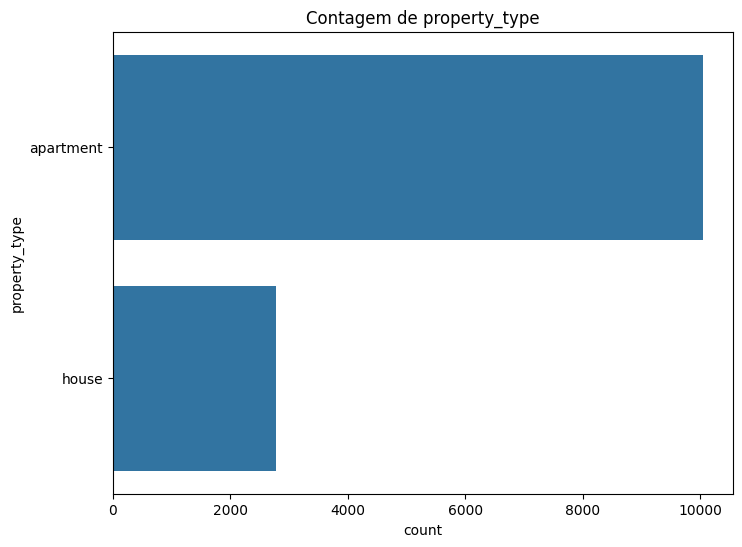


Coluna: state
state
Rio de Janeiro         3000
Rio Grande do Sul      3000
So Paulo              3000
Santa Catarina         3000
Pernambuco              372
Rio Grande do Norte     342
Sergipe                  83
Piau                    29
Rondnia                  5
Tocantins                 2
Name: count, dtype: int64


c:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 139 (\x8b) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


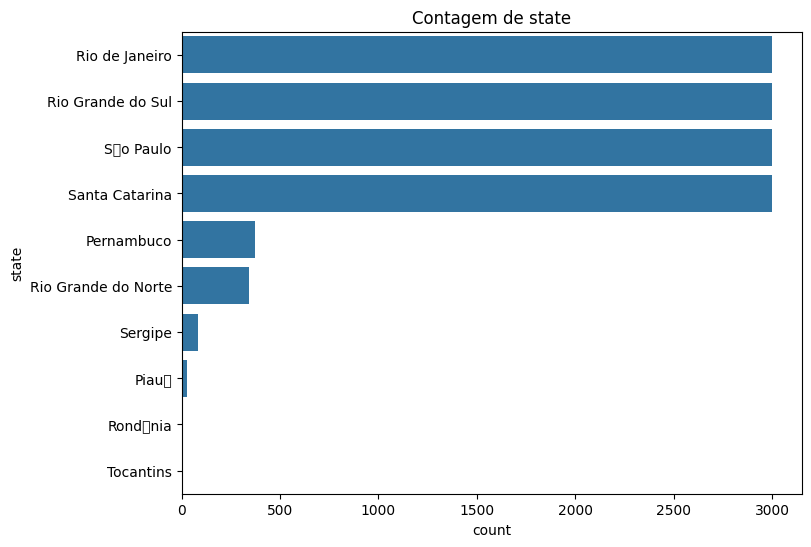


Coluna: region
region
South        6000
Southeast    6000
Northeast     826
North           7
Name: count, dtype: int64


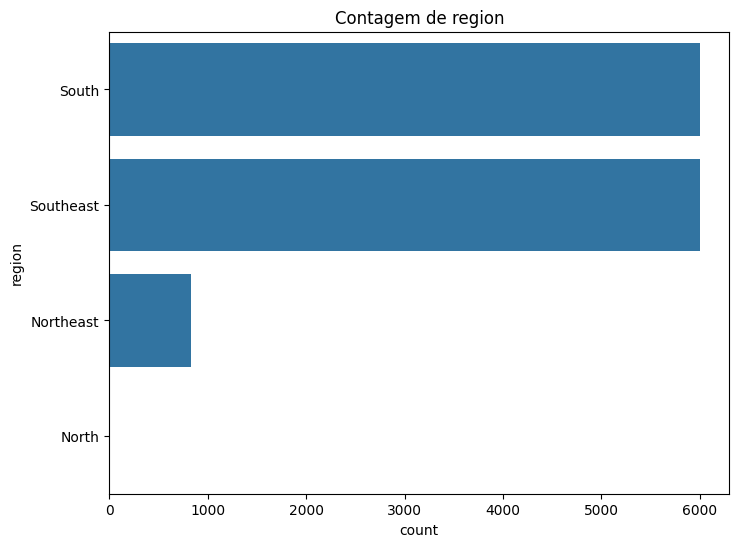

In [68]:

# Análise de colunas categóricas
colunas_categoricas = ['property_type', 'state', 'region']


print("\nAnálise de colunas categóricas:")
for coluna in colunas_categoricas:
    print(f"\nColuna: {coluna}")
    print(dados[coluna].value_counts())

    # Gráfico de barras para visualização
    plt.figure(figsize=(8, 6))
    sns.countplot(y=dados[coluna], order=dados[coluna].value_counts().index)
    plt.title(f"Contagem de {coluna}")
    plt.show()


Análise de colunas numéricas:

Coluna: area_m2


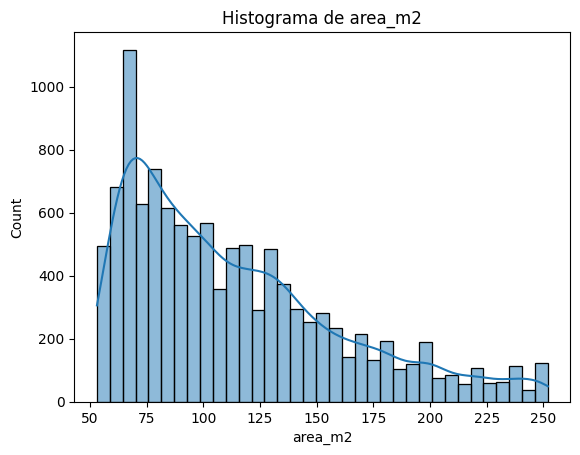

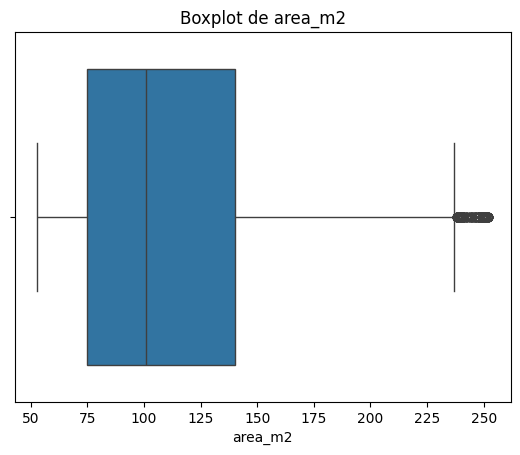


Coluna: price_brl


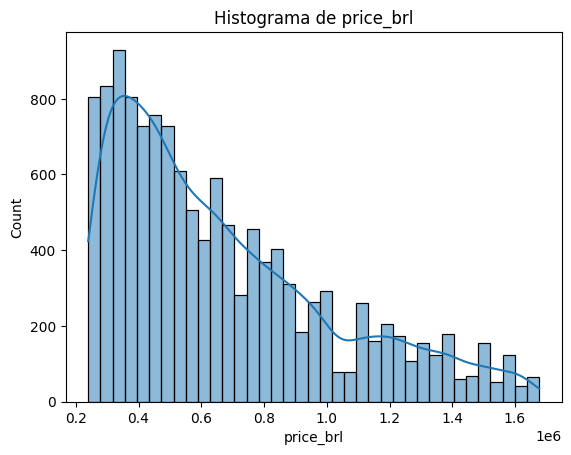

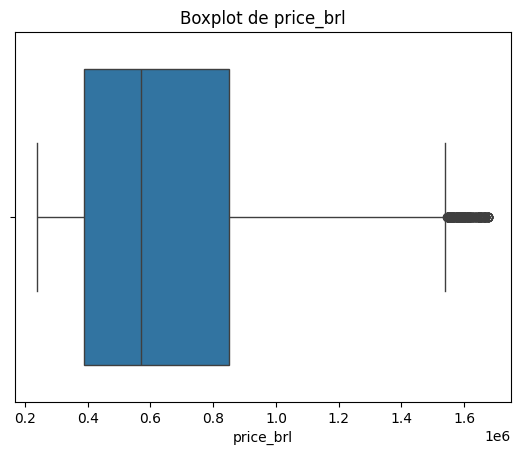

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Análise de colunas numéricas
colunas_numericas = ['area_m2', 'price_brl']

print("\nAnálise de colunas numéricas:")

for coluna in colunas_numericas:
    print(f"\nColuna: {coluna}")

    # Histograma
    plt.figure()
    sns.histplot(dados[coluna], kde=True)
    plt.title(f"Histograma de {coluna}")
    plt.show()

    # Boxplot
    plt.figure()
    sns.boxplot(x=dados[coluna])
    plt.title(f"Boxplot de {coluna}")
    plt.show()
    


# Cruzando dados

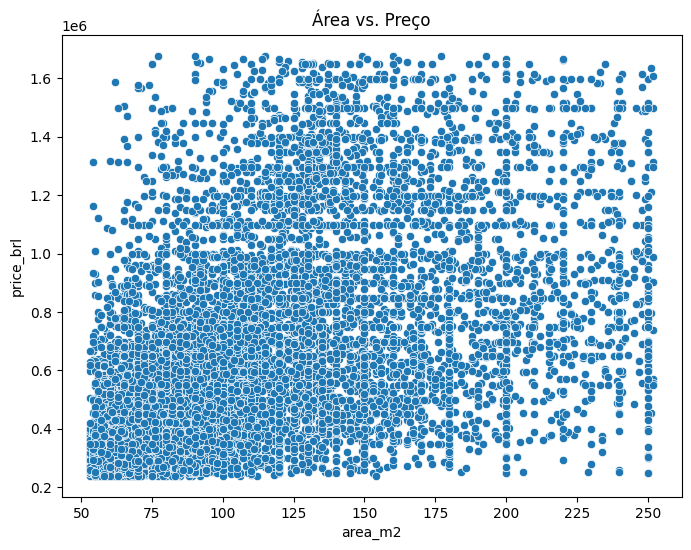

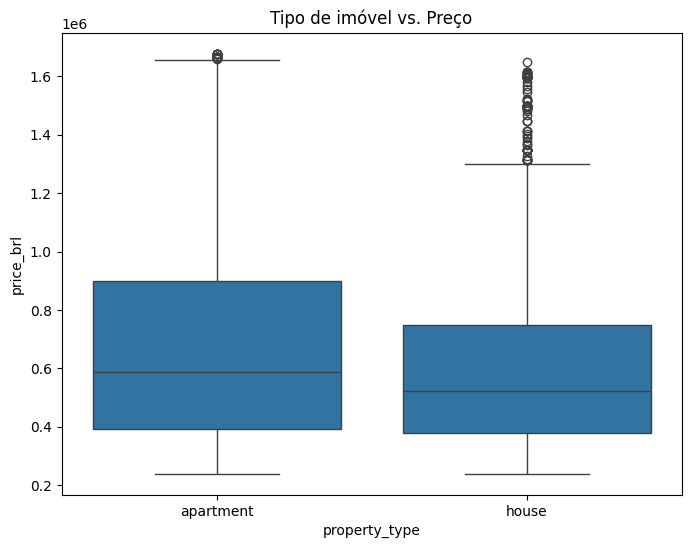

In [59]:
# Relação entre area_m2 e price_brl
plt.figure(figsize=(8, 6))
sns.scatterplot(x='area_m2', y='price_brl', data=dados)
plt.title("Área vs. Preço")
plt.show()

# Relação entre property_type e price_brl
plt.figure(figsize=(8, 6))
sns.boxplot(x='property_type', y='price_brl', data=dados)
plt.title("Tipo de imóvel vs. Preço")
plt.show()

c:\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 139 (\x8b) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 139 (\x8b) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


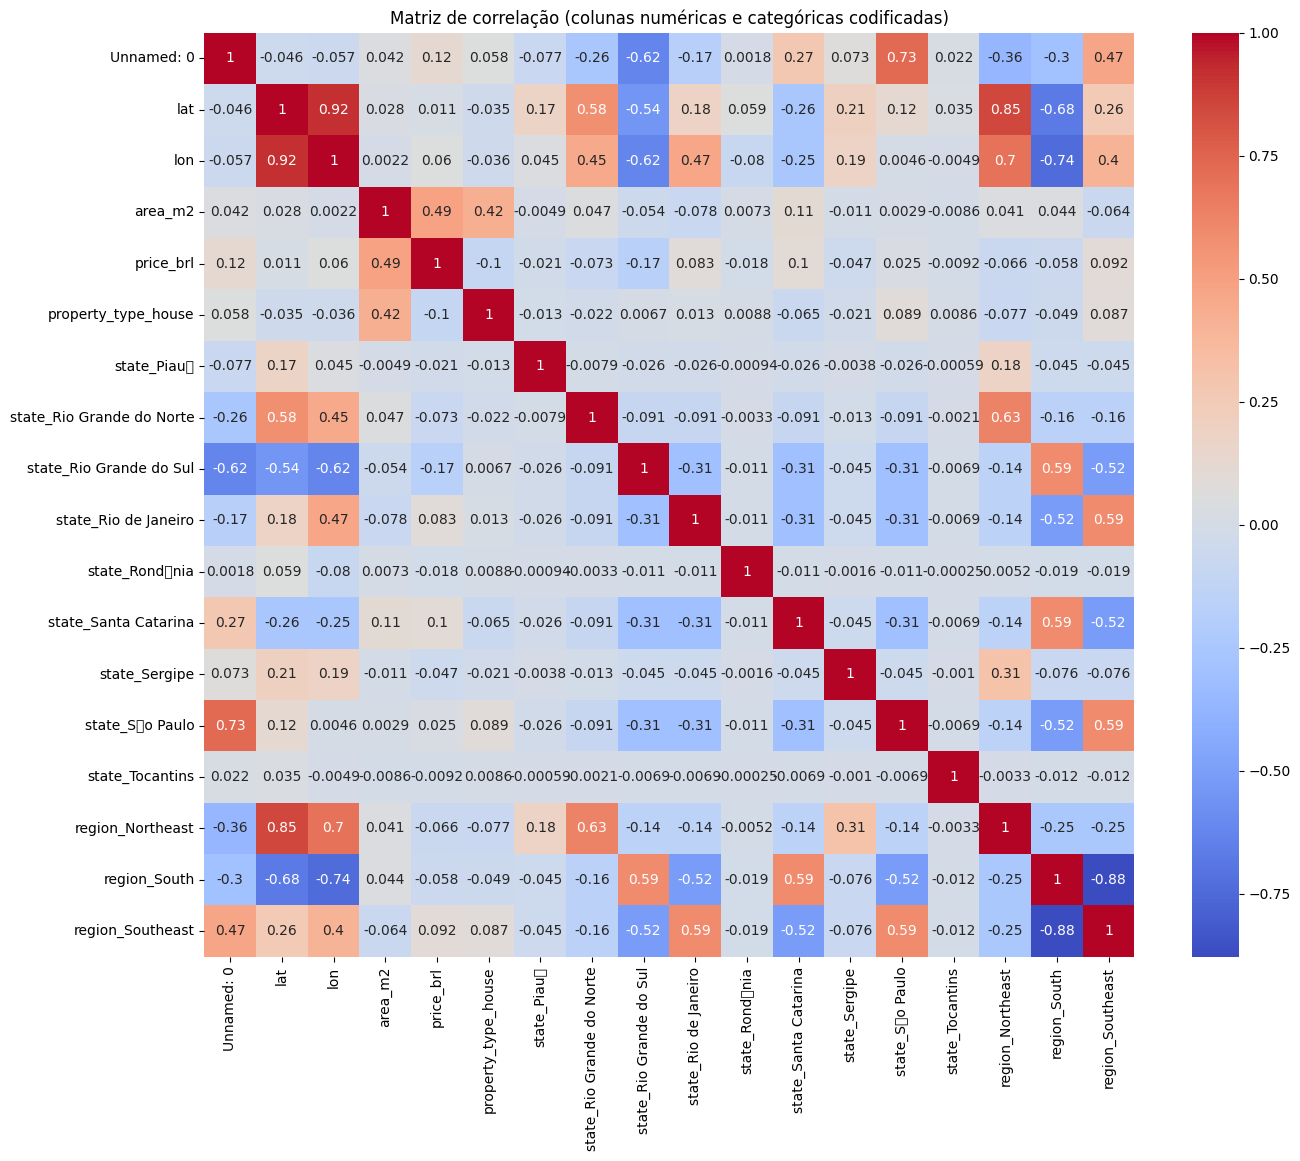

In [60]:
# One-Hot Encoding para colunas categóricas
encoder = OneHotEncoder(sparse_output=False, drop='first') # drop='first' para evitar multicolinearidade
encoded_categorias = encoder.fit_transform(dados[colunas_categoricas])
encoded_df = pd.DataFrame(encoded_categorias, columns=encoder.get_feature_names_out(colunas_categoricas))

# Concatenando colunas numéricas e categóricas codificadas
dados_tratados = pd.concat([dados[colunas_numericas], encoded_df], axis=1)

# Calculando e visualizando a matriz de correlação
plt.figure(figsize=(15, 12))
sns.heatmap(dados_tratados.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlação (colunas numéricas e categóricas codificadas)")
plt.show()

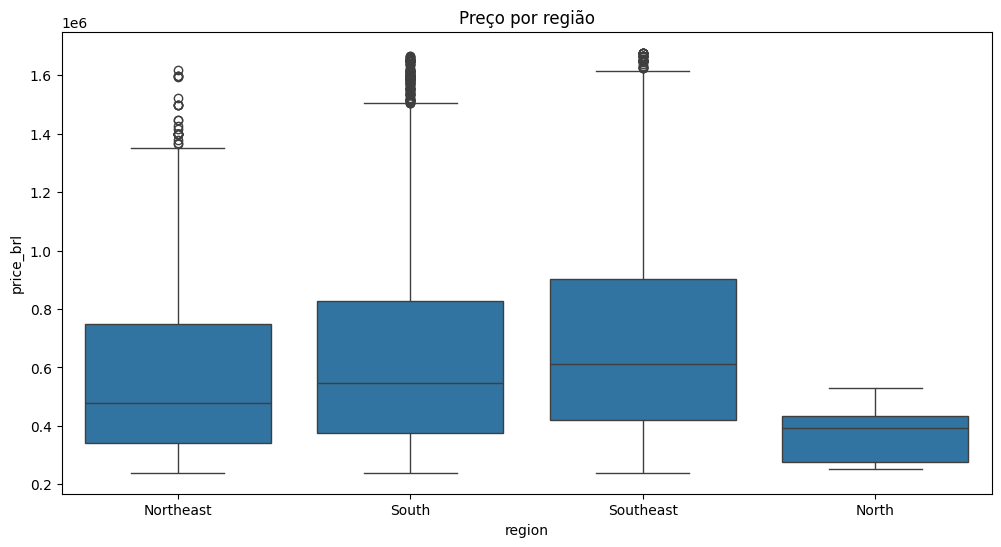

c:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 153 (\x99) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 139 (\x8b) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


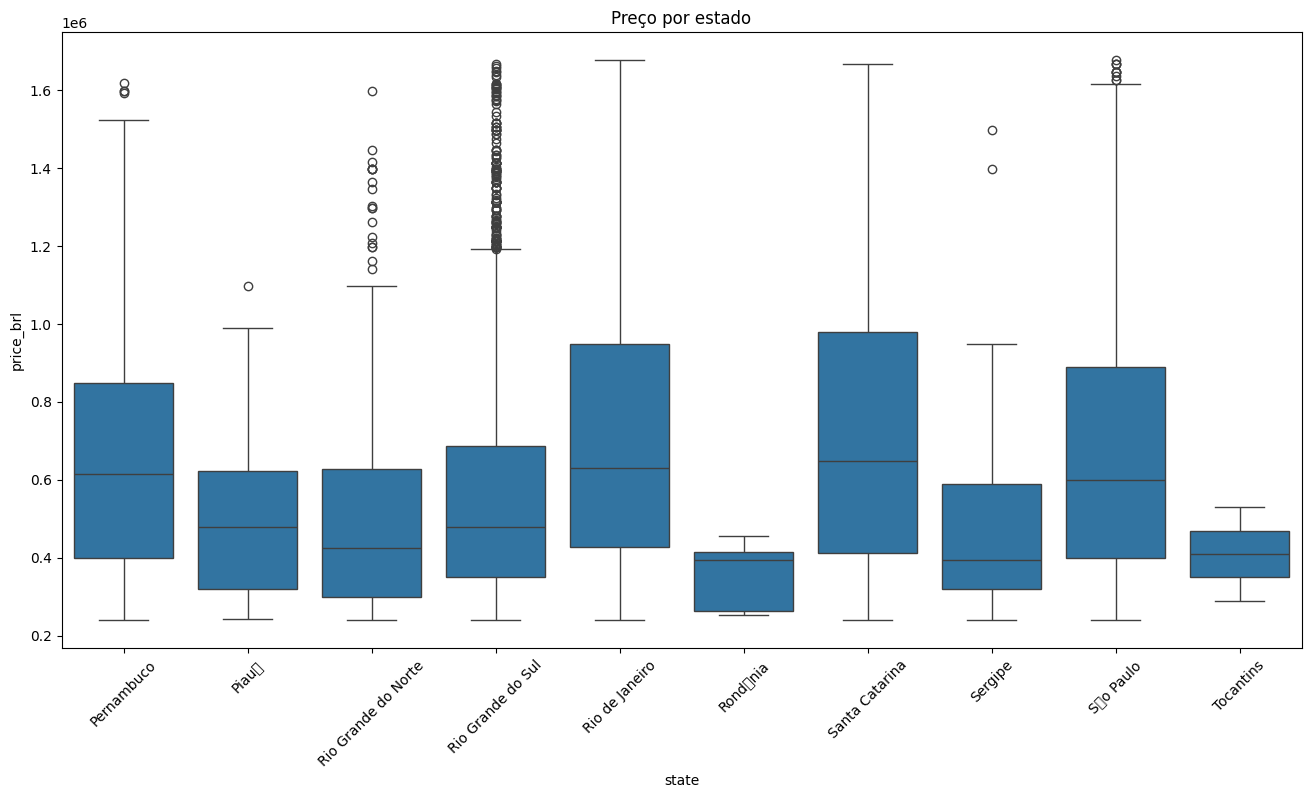

In [62]:
# Preço por região
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='price_brl', data=dados)
plt.title("Preço por região")
plt.show()

# Preço por estado
plt.figure(figsize=(16, 8))
sns.boxplot(x='state', y='price_brl', data=dados)
plt.title("Preço por estado")
plt.xticks(rotation=45)
plt.show()

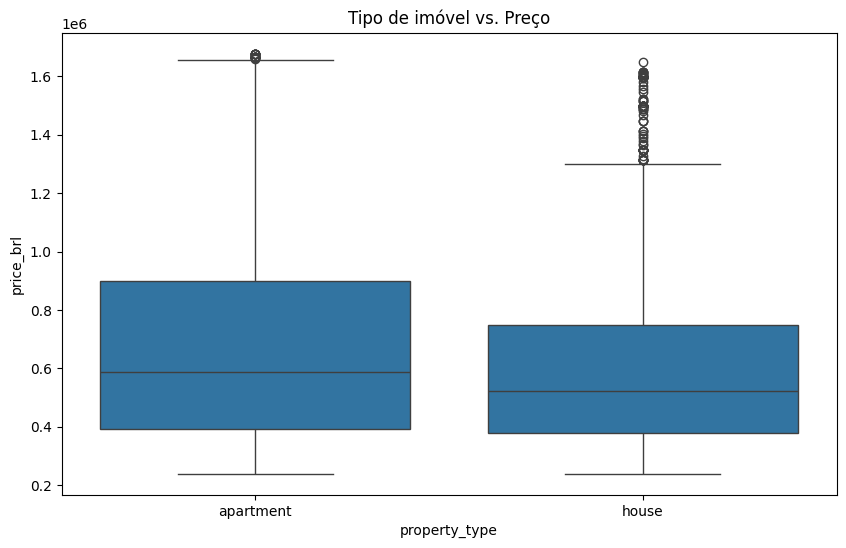

In [63]:
# Tipo de imóvel vs. preço
plt.figure(figsize=(10, 6))
sns.boxplot(x='property_type', y='price_brl', data=dados)
plt.title("Tipo de imóvel vs. Preço")
plt.show()

# Distribuição Geográfica

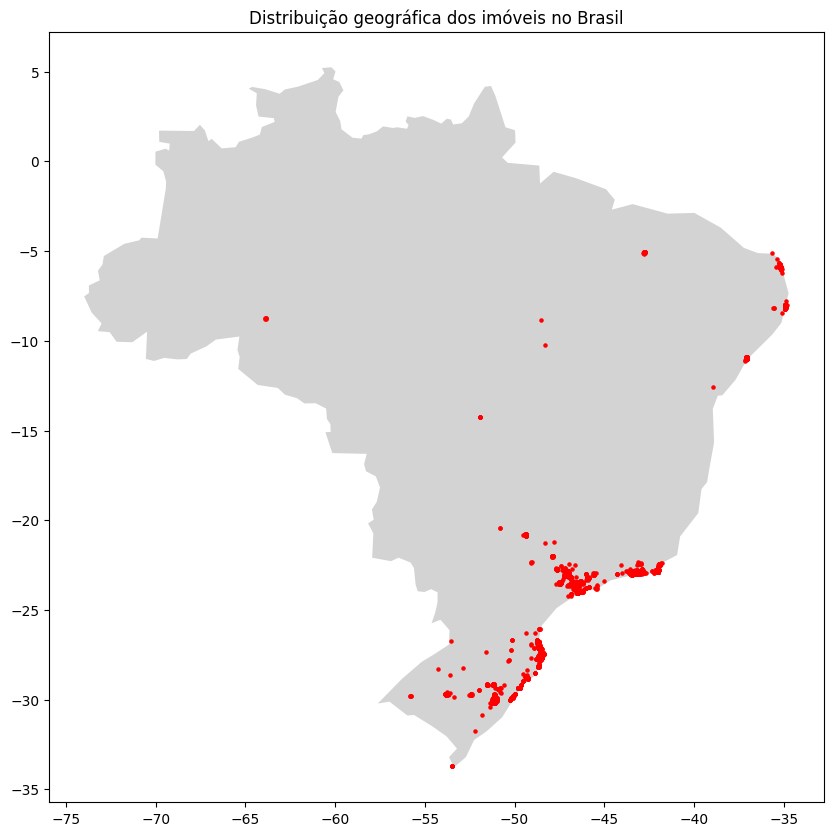

In [70]:
import geopandas
from shapely.geometry import Point

# Criando um GeoDataFrame a partir das coordenadas
geometry = [Point(xy) for xy in zip(dados['lon'], dados['lat'])]
geo_dados = geopandas.GeoDataFrame(dados, geometry=geometry)


# Carregando o mapa do Brasil
brasil = geopandas.read_file("dataset/mapas/ne_110m_admin_0_countries.shp")
brasil = brasil[brasil.ADMIN == 'Brazil']


# Plotando o mapa e os pontos dos imóveis
fig, ax = plt.subplots(figsize=(10, 10))
brasil.plot(ax=ax, color='lightgray')
geo_dados.plot(ax=ax, markersize=5, color='red')
plt.title("Distribuição geográfica dos imóveis no Brasil")
plt.show()